## Automatic Time Series Forecasting

When it comes to **Time Series** forecasting you really need something reliable that can predict efficiently.**Time series** forecasting is crucial in various domains such as **finance, weather forecasting, sales prediction**, and more. Having reliable forecasting models can greatly aid in decision-making and planning.
- The automatic time series forecasting job led to the development of the **Python automatic machine learning library**, known as **AutoTS**. This library can be used for any time series forecasting assignment, such as projecting the price of stocks for the upcoming n days. I'll walk you through a Python lesson on the AutoTS library in this notebook.

### What is AutoTS in Python?

**Time series** forecasting is facilitated by the Python machine learning framework known as AutoTS, or **Automatic Time Series**. I recently used it to predict Netflix stock price for the ensuing ten days, and the results were incredibly accurate. Among the well-liked attributes of the Python AutoTS library are:
Depending on the kind of data being utilised, 
- it can be used to determine which time series forecasting model works best.
- Both univariate and multivariate time series are supported.
- By eliminating and filling in the NaN values and handling outliers, it can also manage jumbled data.
- This Python library also offers models that you may use for deployment.

The pip command can be used to install the Python library **pip install autots** on your machine if you have never used it before for time series forecasting tasks. Let's now examine how to utilise Python's AutoTS package to anticipate stock prices. I'll begin by importing the dataset and the required Python libraries:

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, DeprecationWarning))
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/asus/OneDrive/Desktop/ML_Datasets/project/More_Projects/NFLX_stocks.csv")
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1/3/2023,298.059998,298.390015,288.700012,294.950012,6764000,0,0
1,1/4/2023,298.239990,311.140015,295.510010,309.410004,9345100,0,0
2,1/5/2023,307.000000,314.179993,304.549988,309.700012,8328400,0,0
3,1/6/2023,311.570007,316.769989,303.690002,315.549988,8959800,0,0
4,1/9/2023,316.829987,321.700012,313.220001,315.170013,6766600,0,0
...,...,...,...,...,...,...,...,...
245,12/22/2023,494.000000,496.019989,485.450012,486.760010,2701100,0,0
246,12/26/2023,489.390015,491.480011,486.380005,491.190002,2034500,0,0
247,12/27/2023,491.239990,494.019989,489.250000,491.790008,2561300,0,0
248,12/28/2023,492.000000,492.890015,489.070007,490.510010,1710500,0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          250 non-null    object 
 1   Open          250 non-null    float64
 2   High          250 non-null    float64
 3   Low           250 non-null    float64
 4   Close         250 non-null    float64
 5   Volume        250 non-null    int64  
 6   Dividends     250 non-null    int64  
 7   Stock Splits  250 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 15.8+ KB


I'm utilising **Netflix stock price** data that I acquired from **Yahoo Finance**. Let's now prepare the data and have a look at Netflix's closing stock prices before using the AutoTs library to the task of stock price prediction.

C:\Users\asus\AppData\Local\Temp\ipykernel_16952\245972322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data.Date)


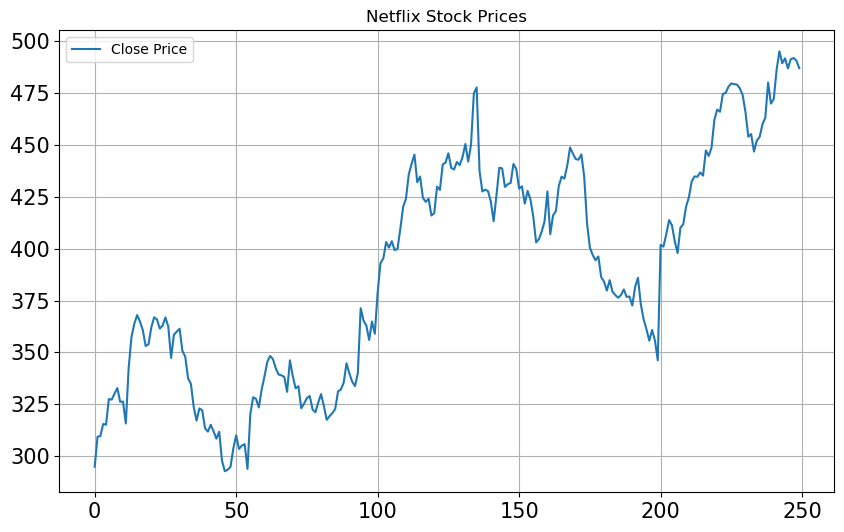

In [3]:
data = data[["Date", "Close"]]
data["Date"] = pd.to_datetime(data.Date)
data["Close"].plot(figsize=(10, 6), title="Netflix Stock Prices", fontsize=15, label="Close Price")
plt.legend()
plt.grid()
plt.show();

Its time to implement autots library.Lets see how it works

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    250 non-null    datetime64[ns]
 1   Close   250 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [5]:
from autots import AutoTS
model = AutoTS(forecast_length=10, frequency='infer', prediction_interval=0.9,
               ensemble='auto',model_list="fast",transformer_list="fast",drop_most_recent=1,
               max_generations=4,num_validations=2,validation_method="backwards")
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)

Using 3 cpus for n_jobs.
Data frequency is: None, used frequency is: None
Frequency is 'None'! Data frequency not recognized.
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model DatepartRegression in generation 0 of 4
Model Number: 5 with model DatepartRegression in generation 0 of 4
Model Number: 6 with model DatepartRegression in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\b

Model Number: 7 with model DatepartRegression in generation 0 of 4
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 4
Model Number: 9 with model ETS in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 10 with model GLM in generation 0 of 4
Model Number: 11 with model GLM in generation 0 of 4
Model Number: 12 with model GLS in generation 0 of 4
Model Number: 13 with model GLS in generation 0 of 4
Model Number: 14 with model LastValueNaive in generation 0 of 4
Model Number: 15 with model LastValueNaive in generation 0 of 4
Model Number: 16 with model LastValueNaive in generation 0 of 4
Model Number: 17 with model LastValueNaive in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 18 with model SeasonalNaive in generation 0 of 4
Model Number: 19 with model SeasonalNaive in generation 0 of 4
Model Number: 20 with model SeasonalNaive in generation 0 of 4
Model Number: 21 with model VAR in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VAR') in model 21 in generation 0: VAR
Model Number: 22 with model VAR in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VAR') in model 22 in generation 0: VAR
Model Number: 23 with model VECM in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VECM') in model 23 in generation 0: VECM
Model Number: 24 with model VECM in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VECM') in model 24 in generation 0: VECM
Model Number: 25 with model WindowRegression in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 26 with model ConstantNaive in generation 0 of 4
Model Number: 27 with model DatepartRegression in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 4
Model Number: 29 with model DatepartRegression in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 30 with model ETS in generation 0 of 4
Model Number: 31 with model VECM in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VECM') in model 31 in generation 0: VECM
Model Number: 32 with model UnivariateMotif in generation 0 of 4
Model Number: 33 with model UnivariateMotif in generation 0 of 4
Model Number: 34 with model SectionalMotif in generation 0 of 4
Model Number: 35 with model SectionalMotif in generation 0 of 4
Model Number: 36 with model SeasonalNaive in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 37 with model DatepartRegression in generation 0 of 4
Model Number: 38 with model NVAR in generation 0 of 4
Model Number: 39 with model Cassandra in generation 0 of 4
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 39 in generation 0: Cassandra
Model Number: 40 with model SeasonalityMotif in generation 0 of 4
Model Number: 41 with model Cassandra in generation 0 of 4
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 41 in generation 0: Cassandra
Model Number: 42 with model Cassandra in generation 0 of 4
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 42 in generation 0: Cassandra
Model Number: 43 with model ConstantNaive in generation 0 of 4
Model Number: 44 with model LastValueNaive in generation 0 of 4
Model Number: 45 with model AverageValueNaive in generation 0 of 4
Model Number: 46 with model GLS in gene

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 48 with model GLM in generation 0 of 4
Model Number: 49 with model ETS in generation 0 of 4
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '1': {'lag_1': 7, 'method': 2}, '2': {'rows': 7, 'lag': 2, 'method': 'additive', 'strength': 0.7, 'first_value_only': False}, '3': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '5': {'method': 'butter', 'method_args': {'N': 6, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.03571428571428571}}}") in model 49 in generation 0: ETS
Model Number: 50 with model VAR in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VAR') in model 50 in generation 0: VAR
Model Number: 51 with model VECM in generation 0 of 4
Template Eval Error: Va

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 53 with model DatepartRegression in generation 0 of 4
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params zero {'0': {'lag_1': 12, 'method': 'LastValue'}, '1': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '2': {'span': 10}, '3': {}, '4': {'method': 'butter', 'method_args': {'N': 8, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.03571428571428571}}, '5': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}}") in model 53 in generation 0: DatepartRegression
Model Number: 54 with model UnivariateMotif in generation 0 of 4
Model Number: 55 with model SectionalMotif in generation 0 of 4
Model Number: 56 with model NVAR in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 57 with model MAR in generation 0 of 4
Template Eval Error: ValueError('Shape of passed values is (7, 1), indices imply (10, 1)') in model 57 in generation 0: MAR
Model Number: 58 with model RRVAR in generation 0 of 4
Model Number: 59 with model KalmanStateSpace in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 60 with model MetricMotif in generation 0 of 4
Model Number: 61 with model Cassandra in generation 0 of 4
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 61 in generation 0: Cassandra
Model Number: 62 with model SeasonalityMotif in generation 0 of 4
Model Number: 63 with model FFT in generation 0 of 4
Model Number: 64 with model BallTreeMultivariateMotif in generation 0 of 4
Template Eval Error: ValueError("Unrecognized metric '['euclidean']'") in model 64 in generation 0: BallTreeMultivariateMotif
Model Number: 65 with model MetricMotif in generation 0 of 4
Model Number: 66 with model LastValueNaive in generation 0 of 4
Model Number: 67 with model ConstantNaive in generation 0 of 4
Model Number: 68 with model LastValueNaive in generation 0 of 4
Model Number: 69 with model VAR in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VAR') in model 69 in generation 0: VAR
Model Number: 70 with m

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 71 with model UnivariateMotif in generation 0 of 4
Model Number: 72 with model FFT in generation 0 of 4
Model Number: 73 with model SeasonalNaive in generation 0 of 4
Model Number: 74 with model GLS in generation 0 of 4
Template Eval Error: Exception("Transformer QuantileTransformer failed on fit from params fake_date {'0': {'rolling_window': 0.05, 'n_tails': 0.05, 'n_future': 0.2, 'method': 'median', 'macro_micro': True}, '1': {'output_distribution': 'uniform', 'n_quantiles': 60}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {}, '4': {'method': 100}, '5': {'method': 'clip', 'std_threshold': 4.5, 'fillna': None}}") in model 74 in generation 0: GLS
Model Number: 75 with model GLM in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 76 with model VECM in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VECM') in model 76 in generation 0: VECM
Model Number: 77 with model SectionalMotif in generation 0 of 4
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 77 in generation 0: SectionalMotif
Model Number: 78 with model ConstantNaive in generation 0 of 4
Model Number: 79 with model ETS in generation 0 of 4
Model Number: 80 with model GLS in generation 0 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {'span': 10}, '1': {'discretization': 'center', 'n_bins': 5}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {}}") in model 80 in generation 0: GLS
Model Number: 81 with model SeasonalNaive in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 82 with model ETS in generation 0 of 4
Model Number: 83 with model UnivariateMotif in generation 0 of 4
Model Number: 84 with model LastValueNaive in generation 0 of 4
Model Number: 85 with model LastValueNaive in generation 0 of 4
Model Number: 86 with model UnivariateMotif in generation 0 of 4
Model Number: 87 with model SeasonalityMotif in generation 0 of 4
Model Number: 88 with model GLM in generation 0 of 4
Model Number: 89 with model SectionalMotif in generation 0 of 4
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 89 in generation 0: SectionalMotif
Model Number: 90 with model UnivariateMotif in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.26274e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero

Model Number: 91 with model VECM in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VECM') in model 91 in generation 0: VECM
Model Number: 92 with model FFT in generation 0 of 4
Model Number: 93 with model NVAR in generation 0 of 4
Model Number: 94 with model LastValueNaive in generation 0 of 4
Model Number: 95 with model UnivariateMotif in generation 0 of 4
Model Number: 96 with model UnivariateMotif in generation 0 of 4
Model Number: 97 with model ETS in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {}, '1': {'decimals': -2, 'on_transform': False, 'on_inverse': True}, '2': {}, '3': {}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': True}}") in model 97 in generation 0: ETS
Model Number: 98 with model SeasonalityMotif in generation 0 of 4
Model Number: 99 with model WindowRegression in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 99 in generation 0: WindowRegression
Model Number: 100 with model NVAR in generation 0 of 4
Model Number: 101 with model ConstantNaive in generation 0 of 4
Model Number: 102 with model DatepartRegression in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 102 in generation 0: DatepartRegression
Model Number: 103 with model DatepartRegression in generation 0 of 4
Template Eval Error: 

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Template Eval Error: ValueError('Shape of passed values is (7, 1), indices imply (10, 1)') in model 104 in generation 0: MAR
Model Number: 105 with model SeasonalityMotif in generation 0 of 4
Model Number: 106 with model VECM in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 106 in generation 0: VECM
Model Number: 107 with model MAR in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Template Eval Error: ValueError('Shape of passed values is (7, 1), indices imply (10, 1)') in model 107 in generation 0: MAR
Model Number: 108 with model SectionalMotif in generation 0 of 4
Model Number: 109 with model SectionalMotif in generation 0 of 4
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params time {'0': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': True, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 1.5, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Template Eval Error: ValueError('Shape of passed values is (7, 1), indices imply (10, 1)') in model 113 in generation 0: MAR
Model Number: 114 with model ConstantNaive in generation 0 of 4
Model Number: 115 with model GLM in generation 0 of 4
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params zero {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'Discretize'}, 'transformation_params': {'0': {'discretization': 'center', 'n_bins': 20}}}}, '2': {'method': 'butter', 'method_args': {'N': 3, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.25}}}") in model 115 in generation 0: GLM
Model Number: 116 with model ETS in generation 0 of 4
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {}, '1': {'method': 'butter', 'method_args': {'N': 1, 'btype': 'highpass', 'analog': False, 'output':

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 118 in generation 0: DatepartRegression
Model Number: 119 with model SeasonalityMotif in generation 0 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params median {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'output_distribution': 'uniform', 'n_quantiles': 100}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 119 in generation 0: SeasonalityMotif
Model Number: 120 with model SectionalMotif in generation 0 of 4
Model Number: 121 with model SectionalMotif in generation 0 of 4
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 121 in generation 0: SectionalMotif
Model Number: 122 with model ETS in generation 0 of 4
Model Number: 123 with mo

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anacond

Model Number: 127 with model SeasonalityMotif in generation 0 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}}, '2': {'span': 12}, '3': {'rows': 7, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 127 in generation 0: SeasonalityMotif
Model Number: 128 with model VECM in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VECM') in model 128 in generation 0: VECM
Model Number: 129 with model SectionalMotif in generation 0 of 4
Model Number: 130 with model MetricMotif in generation 0 of 4
Model Number: 131 with model FFT in generation 0 of 4
Model Number: 132 with model LastValueNaive in generation 0 of 4
Model N

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 136 with model WindowRegression in generation 0 of 4
Model Number: 137 with model ETS in generation 0 of 4
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'window_size': 364, 'alpha': 3.5, 'grouping_forward_limit': 2, 'max_level_shifts': 5, 'alignment': 'last_value'}, '2': {'method': 'butter', 'method_args': {'N': 2, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.25}}, '3': {'lag_1': 12, 'method': 20}, '4': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '5': {'lag_1': 7, 'method': 'LastValue'}}") in model 137 in generation 0: ETS
Model Number: 138 with model ConstantNaive in generation 0 of 4
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params zero {'0': {}, '1': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 3, 'min_samples_split'

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 140 with model ETS in generation 0 of 4
Model Number: 141 with model VAR in generation 0 of 4
Template Eval Error: ValueError('Only gave one variable to VAR') in model 141 in generation 0: VAR
Model Number: 142 with model DatepartRegression in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 143 with model GLM in generation 0 of 4
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 143 in generation 0: GLM
Model Number: 144 with model SeasonalityMotif in generation 0 of 4
Model Number: 145 with model SectionalMotif in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 146 with model UnivariateMotif in generation 0 of 4
Model Number: 147 with model LastValueNaive in generation 0 of 4
Model Number: 148 with model NVAR in generation 0 of 4
Model Number: 149 with model RRVAR in generation 0 of 4
Model Number: 150 with model FFT in generation 0 of 4
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params zero {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': 'pchip', 'transformations': {'0': 'StandardScaler', '1': 'Slice'}, 'transformation_params': {'0': {}, '1': {'method': 0.5}}}, 'holiday_countries_used': False}, 'holiday_params': None}, '1': {}, '2': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '3': {}}") in model 150 in generation 0: FFT
Model Number: 151 with model UnivariateMotif in generation 0 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 152 with model LastValueNaive in generation 0 of 4
Template Eval Error: Exception("Transformer RobustScaler failed on inverse from params cubic {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '2': {'rolling_window': 0.1, 'n_tails': 90, 'n_future': 0.2, 'method': 'median', 'macro_micro': True}, '3': {}, '4': {'model': 'GLS', 'phi': 1, 'window': 30, 'transform_dict': {'fillna': None, 'transformations': {'0': 'bkfilter'}, 'transformation_params': {'0': {}}}}, '5': {'method': 'zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}}") in model 152 in generation 0: LastValueNaive
New Generation: 1 of 4
Model Number: 153 with model LastValueNaive in generation 1 of 4
Model Number: 154 with model SeasonalityMotif in generation 1 of 4
Model Number: 155 with model UnivariateMotif in generation 1 of 4
Model Number: 156 with model SeasonalNaive

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 159 with model ETS in generation 1 of 4
Model Number: 160 with model GLM in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 161 with model DatepartRegression in generation 1 of 4
Model Number: 162 with model GLS in generation 1 of 4
Model Number: 163 with model AverageValueNaive in generation 1 of 4
Model Number: 164 with model NVAR in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 165 with model WindowRegression in generation 1 of 4
Model Number: 166 with model MetricMotif in generation 1 of 4
Model Number: 167 with model ETS in generation 1 of 4
Model Number: 168 with model NVAR in generation 1 of 4
Model Number: 169 with model SeasonalNaive in generation 1 of 4
Model Number: 170 with model UnivariateMotif in generation 1 of 4
Model Number: 171 with model AverageValueNaive in generation 1 of 4
Model Number: 172 with model AverageValueNaive in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: i

Model Number: 173 with model Cassandra in generation 1 of 4
Model Number: 174 with model UnivariateMotif in generation 1 of 4
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean_24 {'0': {'lag_1': 12, 'method': 'LastValue'}, '1': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': True, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'isolated_only': True}, 'remove_excess_anomalies': True, 'impact': 'regression', 'regression_params': {}}, '2': {'decimals': 2, 'on_transform': True, 'on_inverse': False}}") in model 174 in generation 1: UnivariateMotif
M

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 183 with model AverageValueNaive in generation 1 of 4
Model Number: 184 with model SectionalMotif in generation 1 of 4
Model Number: 185 with model KalmanStateSpace in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 186 with model SeasonalityMotif in generation 1 of 4
Model Number: 187 with model UnivariateMotif in generation 1 of 4
Model Number: 188 with model SeasonalNaive in generation 1 of 4
Model Number: 189 with model DatepartRegression in generation 1 of 4
Model Number: 190 with model SeasonalityMotif in generation 1 of 4
Model Number: 191 with model RRVAR in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 192 with model LastValueNaive in generation 1 of 4
Model Number: 193 with model UnivariateMotif in generation 1 of 4
Model Number: 194 with model ConstantNaive in generation 1 of 4
Model Number: 195 with model DatepartRegression in generation 1 of 4
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 195 in generation 1: DatepartRegression
Model Number: 196 with model GLM in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 197 with model SectionalMotif in generation 1 of 4
Model Number: 198 with model SectionalMotif in generation 1 of 4
Model Number: 199 with model SectionalMotif in generation 1 of 4
Model Number: 200 with model DatepartRegression in generation 1 of 4
Model Number: 201 with model LastValueNaive in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 202 with model AverageValueNaive in generation 1 of 4
Model Number: 203 with model SeasonalityMotif in generation 1 of 4
Model Number: 204 with model RRVAR in generation 1 of 4
Model Number: 205 with model UnivariateMotif in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Template Eval Error: ValueError('kth(=100) out of bounds (81)') in model 205 in generation 1: UnivariateMotif
Model Number: 206 with model GLS in generation 1 of 4
Model Number: 207 with model SeasonalityMotif in generation 1 of 4
Model Number: 208 with model UnivariateMotif in generation 1 of 4
Model Number: 209 with model RRVAR in generation 1 of 4
Model Number: 210 with model GLM in generation 1 of 4
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 210 in generation 1: GLM
Model Number: 211 with model UnivariateMotif in generation 1 of 4
Model Number: 212 with model SeasonalityMotif in generation 1 of 4
Model Number: 213 with model SeasonalityMotif in generation 1 of 4
Template Eval Error: ValueError('kth(=99) out of bounds (91)') in model 213 in generation 1: SeasonalityMotif
Model Number: 214 with model FFT in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:4

Model Number: 215 with model NVAR in generation 1 of 4
Model Number: 216 with model DatepartRegression in generation 1 of 4
Model Number: 217 with model WindowRegression in generation 1 of 4
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 217 in generation 1: WindowRegression
Model Number: 218 with model SeasonalityMotif in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 219 with model SeasonalNaive in generation 1 of 4
Model Number: 220 with model DatepartRegression in generation 1 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 220 in generation 1: DatepartRegression
Model Number: 221 with model WindowRegression in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 222 with model GLS in generation 1 of 4
Model Number: 223 with model ETS in generation 1 of 4
Model Number: 224 with model GLS in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzer

Model Number: 225 with model ConstantNaive in generation 1 of 4
Model Number: 226 with model ConstantNaive in generation 1 of 4
Model Number: 227 with model SeasonalNaive in generation 1 of 4
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params rolling_mean_24 {'0': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 2}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}, 'holiday_countries_used': False}, 'holiday_params': None}, '1': {}, '2': {}, '3': {'method': 'butter', 'method_args': {'N': 2, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.5}}}") in model 227 in generation 1: SeasonalNaive
Model Number: 228 with model GLM in generation 1 of 4
Model Nu

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 232 with model GLM in generation 1 of 4
Model Number: 233 with model FFT in generation 1 of 4
Model Number: 234 with model WindowRegression in generation 1 of 4
Model Number: 235 with model LastValueNaive in generation 1 of 4
Model Number: 236 with model UnivariateMotif in generation 1 of 4
Model Number: 237 with model SeasonalityMotif in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 238 with model AverageValueNaive in generation 1 of 4
Model Number: 239 with model NVAR in generation 1 of 4
Model Number: 240 with model SeasonalityMotif in generation 1 of 4
Model Number: 241 with model DatepartRegression in generation 1 of 4
Model Number: 242 with model GLS in generation 1 of 4
Model Number: 243 with model FFT in generation 1 of 4
Model Number: 244 with model LastValueNaive in generation 1 of 4
Model Number: 245 with model NVAR in generation 1 of 4
Model Number: 246 with model UnivariateMotif in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 247 with model LastValueNaive in generation 1 of 4
Model Number: 248 with model RRVAR in generation 1 of 4
Model Number: 249 with model SeasonalNaive in generation 1 of 4
Model Number: 250 with model NVAR in generation 1 of 4
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {}, '1': {'method': 'butter', 'method_args': {'N': 2, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.011904761904761904}}, '2': {}, '3': {'method': 'clip', 'std_threshold': 4, 'fillna': None}}") in model 250 in generation 1: NVAR
Model Number: 251 with model NVAR in generation 1 of 4
Model Number: 252 with model NVAR in generation 1 of 4
Model Number: 253 with model GLM in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 253 in generation 1: GLM
Model Number: 254 with model SeasonalNaive in generation 1 of 4
Model Number: 255 with model SeasonalNaive in generation 1 of 4
Model Number: 256 with model LastValueNaive in generation 1 of 4
Model Number: 257 with model UnivariateMotif in generation 1 of 4
Model Number: 258 with model ConstantNaive in generation 1 of 4
Model Number: 259 with model MetricMotif in generation 1 of 4
Model Number: 260 with model MetricMotif in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:

Model Number: 261 with model WindowRegression in generation 1 of 4
Model Number: 262 with model NVAR in generation 1 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


New Generation: 2 of 4
Model Number: 263 with model NVAR in generation 2 of 4
Model Number: 264 with model UnivariateMotif in generation 2 of 4
Model Number: 265 with model FFT in generation 2 of 4
Model Number: 266 with model ConstantNaive in generation 2 of 4
Model Number: 267 with model ConstantNaive in generation 2 of 4
Model Number: 268 with model AverageValueNaive in generation 2 of 4
Model Number: 269 with model AverageValueNaive in generation 2 of 4
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params rolling_mean_24 {'0': {'method': 'butter', 'method_args': {'N': 3, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.03571428571428571}}, '1': {'center': 'mean'}, '2': {}, '3': {'whiten': True}, '4': {'rows': 4}}") in model 269 in generation 2: AverageValueNaive
Model Number: 270 with model DatepartRegression in generation 2 of 4
Model Number: 271 with model LastValueNaive in generation 2 of 4
Model Number: 272 with model DatepartRegression

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 274 with model ETS in generation 2 of 4
Model Number: 275 with model SectionalMotif in generation 2 of 4
Model Number: 276 with model ConstantNaive in generation 2 of 4
Model Number: 277 with model AverageValueNaive in generation 2 of 4
Model Number: 278 with model WindowRegression in generation 2 of 4
Model Number: 279 with model NVAR in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 280 with model SeasonalityMotif in generation 2 of 4
Model Number: 281 with model NVAR in generation 2 of 4
Model Number: 282 with model GLS in generation 2 of 4
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean {'0': {'fixed': True, 'window': 3}, '1': {}, '2': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': True, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.1}}}}}, 'isolated_only': False}, 'remo

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 286 with model ETS in generation 2 of 4
Model Number: 287 with model UnivariateMotif in generation 2 of 4
Model Number: 288 with model FFT in generation 2 of 4
Model Number: 289 with model SeasonalNaive in generation 2 of 4
Model Number: 290 with model SeasonalNaive in generation 2 of 4
Model Number: 291 with model SeasonalityMotif in generation 2 of 4
Model Number: 292 with model GLS in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 293 with model WindowRegression in generation 2 of 4
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 293 in generation 2: WindowRegression
Model Number: 294 with model GLM in generation 2 of 4
Model Number: 295 with model SeasonalNaive in generation 2 of 4
Model Number: 296 with model UnivariateMotif in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 297 with model AverageValueNaive in generation 2 of 4
Model Number: 298 with model RRVAR in generation 2 of 4
Model Number: 299 with model RRVAR in generation 2 of 4
Model Number: 300 with model SectionalMotif in generation 2 of 4
Model Number: 301 with model FFT in generation 2 of 4
Model Number: 302 with model LastValueNaive in generation 2 of 4
Model Number: 303 with model UnivariateMotif in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 304 with model NVAR in generation 2 of 4
Model Number: 305 with model DatepartRegression in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 306 with model KalmanStateSpace in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {}}") in model 306 in generation 2: KalmanStateSpace
Model Number: 307 with model NVAR in generation 2 of 4
Model Number: 308 with model RRVAR in generation 2 of 4
Model Number: 309 with model UnivariateMotif in generation 2 of 4
Model Number: 310 with model GLM in generation 2 of 4
Model Number: 311 with model LastValueNaive in generation 2 of 4
Model Number: 312 with model DatepartRegression in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 313 with model RRVAR in generation 2 of 4
Model Number: 314 with model ETS in generation 2 of 4
Model Number: 315 with model FFT in generation 2 of 4
Model Number: 316 with model UnivariateMotif in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.864e+01, tolerance: 1.546e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: R

Model Number: 317 with model MetricMotif in generation 2 of 4
Model Number: 318 with model ETS in generation 2 of 4
Model Number: 319 with model ETS in generation 2 of 4
Model Number: 320 with model WindowRegression in generation 2 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 320 in generation 2: WindowRegression
Model Number: 321 with model AverageValueNaive in generation 2 of 4
Model Number: 322 with model FFT in generation 2 of 4
Model Number: 323 with model GLM in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 324 with model DatepartRegression in generation 2 of 4
Model Number: 325 with model FFT in generation 2 of 4
Model Number: 326 with model MetricMotif in generation 2 of 4
Model Number: 327 with model AverageValueNaive in generation 2 of 4
Model Number: 328 with model ConstantNaive in generation 2 of 4
Model Number: 329 with model SeasonalNaive in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: i

Model Number: 330 with model SectionalMotif in generation 2 of 4
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params nearest {'0': {'threshold': 0.7, 'splash_threshold': 0.4, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'uniform', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}}}") in model 330 in generation 2: SectionalMotif
Model Number: 331 with model GLM in generation 2 of 4
Model Number: 332 with model N

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 337 with model AverageValueNaive in generation 2 of 4
Model Number: 338 with model LastValueNaive in generation 2 of 4
Model Number: 339 with model ETS in generation 2 of 4
Model Number: 340 with model DatepartRegression in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 341 with model AverageValueNaive in generation 2 of 4
Model Number: 342 with model WindowRegression in generation 2 of 4
Model Number: 343 with model AverageValueNaive in generation 2 of 4
Model Number: 344 with model SectionalMotif in generation 2 of 4
Model Number: 345 with model LastValueNaive in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 346 with model UnivariateMotif in generation 2 of 4
Model Number: 347 with model SeasonalityMotif in generation 2 of 4
Model Number: 348 with model UnivariateMotif in generation 2 of 4
Model Number: 349 with model MetricMotif in generation 2 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'lag_1': 12, 'method': 'Mean'}, '1': {'sigma': 1.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 3, 'min_samples_split': 2}}, 'datepart_method': 'simple_2', 'polynomial_degree': 2, 'transform_dict': {'fillna': None, 'transformations': {'0': 'bkfilter'}, 'transformation_params': {'0': {}}}, 'holiday_countries_used': False}, 'holiday_params': None}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'model_name': 'local_linear_trend_ets_aan', 'state_transition': [[1, 1], [0, 1]], 'p

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: i

Model Number: 353 with model GLS in generation 2 of 4
Model Number: 354 with model GLS in generation 2 of 4
Model Number: 355 with model NVAR in generation 2 of 4
Model Number: 356 with model WindowRegression in generation 2 of 4
Model Number: 357 with model RRVAR in generation 2 of 4
Model Number: 358 with model LastValueNaive in generation 2 of 4
Model Number: 359 with model GLM in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 360 with model SeasonalityMotif in generation 2 of 4
Model Number: 361 with model WindowRegression in generation 2 of 4
Template Eval Error: KeyError('model') in model 361 in generation 2: WindowRegression
Model Number: 362 with model SectionalMotif in generation 2 of 4
Model Number: 363 with model GLM in generation 2 of 4
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 363 in generation 2: GLM
Model Number: 364 with model GLM in generation 2 of 4
Template Eval Error: ValueError('Model GLM returned NaN for one or more series. fail_on_forecast_nan=True') in model 364 in generation 2: GLM
Model Number: 365 with model AverageValueNaive in generation 2 of 4
Model Number: 366 with model SeasonalNaive in generation 2 of 4
Model Number: 367 with model SeasonalNaive in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endo

Model Number: 368 with model UnivariateMotif in generation 2 of 4
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'method': 'butter', 'method_args': {'N': 2, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.013513513513513514}}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}}") in model 368 in generation 2: UnivariateMotif
Model Number: 369 with model SeasonalityMotif in generation 2 of 4
Model Number: 370 with model NVAR in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 371 with model WindowRegression in generation 2 of 4
Model Number: 372 with model SeasonalityMotif in generation 2 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


New Generation: 3 of 4
Model Number: 373 with model LastValueNaive in generation 3 of 4
Model Number: 374 with model SeasonalNaive in generation 3 of 4
Model Number: 375 with model SeasonalNaive in generation 3 of 4
Model Number: 376 with model GLM in generation 3 of 4
Model Number: 377 with model ETS in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 378 with model AverageValueNaive in generation 3 of 4
Template Eval Error: Exception("Transformer Detrend failed on fit from params zero {'0': {}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}}, '2': {'model_name': 'AR(2)', 'state_transition': [[1, 1], [0.1, 0]], 'process_noise': [[1, 0], [0, 0]], 'observation_model': [[1, 0]], 'observation_noise': 1.0, 'em_iter': None}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '4': {'lag_1': 12, 'method': 'LastValue'}}") in model 378 in generation 3: AverageValueNaive
Model Number: 379 with

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 385 with model ETS in generation 3 of 4
Model Number: 386 with model SeasonalNaive in generation 3 of 4
Model Number: 387 with model KalmanStateSpace in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 388 with model SeasonalNaive in generation 3 of 4
Model Number: 389 with model GLM in generation 3 of 4
Model Number: 390 with model DatepartRegression in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:527:

Model Number: 391 with model GLM in generation 3 of 4
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 391 in generation 3: GLM
Model Number: 392 with model KalmanStateSpace in generation 3 of 4
Model Number: 393 with model LastValueNaive in generation 3 of 4
Model Number: 394 with model SeasonalityMotif in generation 3 of 4
Model Number: 395 with model SeasonalNaive in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 396 with model UnivariateMotif in generation 3 of 4
Model Number: 397 with model NVAR in generation 3 of 4
Model Number: 398 with model NVAR in generation 3 of 4
Model Number: 399 with model ETS in generation 3 of 4
Model Number: 400 with model NVAR in generation 3 of 4
Model Number: 401 with model SectionalMotif in generation 3 of 4
Model Number: 402 with model DatepartRegression in generation 3 of 4
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 402 in generation 3: DatepartRegression
Model Number: 403 with model ETS in generation 3 of 4
Model Number: 404 with model RRVAR in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 405 with model NVAR in generation 3 of 4
Model Number: 406 with model FFT in generation 3 of 4
Model Number: 407 with model SeasonalityMotif in generation 3 of 4
Model Number: 408 with model SeasonalityMotif in generation 3 of 4
Model Number: 409 with model ConstantNaive in generation 3 of 4
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params None {'0': {'n_harmonics': 10, 'detrend': 'linear'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'rows': 1}, '3': {}, '4': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 4, 'deriv': 0, 'mode': 'nearest'}}, '5': {'cutoff': 0.1, 'reverse': False}}") in model 409 in generation 3: ConstantNaive
Model Number: 410 with model ETS in generation 3 of 4
Model Number: 411 with model GLM in generation 3 of 4
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in m

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 412 with model AverageValueNaive in generation 3 of 4
Model Number: 413 with model AverageValueNaive in generation 3 of 4
Model Number: 414 with model MetricMotif in generation 3 of 4
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean_24 {'0': {}, '1': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'uniform', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.1}}}}}, 'isolated_only': True}, 'remove_excess_anomalies': False,

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 418 with model GLM in generation 3 of 4
Model Number: 419 with model AverageValueNaive in generation 3 of 4
Model Number: 420 with model ETS in generation 3 of 4
Model Number: 421 with model GLS in generation 3 of 4
Model Number: 422 with model LastValueNaive in generation 3 of 4
Model Number: 423 with model NVAR in generation 3 of 4
Model Number: 424 with model AverageValueNaive in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning

Model Number: 425 with model FFT in generation 3 of 4
Model Number: 426 with model MetricMotif in generation 3 of 4
Model Number: 427 with model ConstantNaive in generation 3 of 4
Model Number: 428 with model WindowRegression in generation 3 of 4
Model Number: 429 with model UnivariateMotif in generation 3 of 4
Model Number: 430 with model SeasonalityMotif in generation 3 of 4
Model Number: 431 with model GLS in generation 3 of 4
Model Number: 432 with model LastValueNaive in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 433 with model LastValueNaive in generation 3 of 4
Model Number: 434 with model UnivariateMotif in generation 3 of 4
Model Number: 435 with model SeasonalityMotif in generation 3 of 4
Model Number: 436 with model NVAR in generation 3 of 4
Model Number: 437 with model UnivariateMotif in generation 3 of 4
Model Number: 438 with model NVAR in generation 3 of 4
Model Number: 439 with model FFT in generation 3 of 4
Model Number: 440 with model SeasonalityMotif in generation 3 of 4
Model Number: 441 with model FFT in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 442 with model RRVAR in generation 3 of 4
Model Number: 443 with model FFT in generation 3 of 4
Model Number: 444 with model SeasonalityMotif in generation 3 of 4
Model Number: 445 with model RRVAR in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Template Eval Error: LinAlgError('SVD did not converge') in model 445 in generation 3: RRVAR
Model Number: 446 with model ETS in generation 3 of 4
Model Number: 447 with model MetricMotif in generation 3 of 4
Model Number: 448 with model SeasonalityMotif in generation 3 of 4
Model Number: 449 with model AverageValueNaive in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:2027: RuntimeWarning: overflow encountered in divide
  s = divide(1, s, where=large, out=s)
C:\Users\asus\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:2030: RuntimeWarning: invalid value encountered in matmul
  res = matmul(transpose(vt), multiply(s[..., newaxis], transpose(u)))
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\matrix_var.py:30: RuntimeWarning: invalid value encountered in matmul
  W = X2 @ np.linalg.pinv((V @ X1))
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value en

Model Number: 450 with model UnivariateMotif in generation 3 of 4
Model Number: 451 with model SeasonalNaive in generation 3 of 4
Model Number: 452 with model AverageValueNaive in generation 3 of 4
Model Number: 453 with model WindowRegression in generation 3 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 453 in generation 3: WindowRegression
Model Number: 454 with model WindowRegression in generation 3 of 4
Model Number: 455 with model NVAR in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 456 with model UnivariateMotif in generation 3 of 4
Model Number: 457 with model ConstantNaive in generation 3 of 4
Model Number: 458 with model WindowRegression in generation 3 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 458 in generation 3: WindowRegression
Model Number: 459 with model ConstantNaive in generation 3 of 4
Model Number: 460 with model ETS in generation 3 of 4
Model Number: 461 with model DatepartRegression in generation 3 of 4
Model Number: 462 with model GLS in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.328e+05, tolerance: 6.668e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: R

Model Number: 463 with model GLS in generation 3 of 4
Model Number: 464 with model DatepartRegression in generation 3 of 4
Model Number: 465 with model WindowRegression in generation 3 of 4
Model Number: 466 with model SectionalMotif in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 467 with model Cassandra in generation 3 of 4
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 467 in generation 3: Cassandra
Model Number: 468 with model ConstantNaive in generation 3 of 4
Model Number: 469 with model SeasonalNaive in generation 3 of 4
Model Number: 470 with model SeasonalityMotif in generation 3 of 4
Model Number: 471 with model DatepartRegression in generation 3 of 4
Model Number: 472 with model UnivariateMotif in generation 3 of 4
Model Number: 473 with model MetricMotif in generation 3 of 4
Model Number: 474 with model AverageValueNaive in generation 3 of 4
Model Number: 475 with model SeasonalityMotif in generation 3 of 4
Model Number: 476 with model UnivariateMotif in generation 3 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 477 with model LastValueNaive in generation 3 of 4
Model Number: 478 with model FFT in generation 3 of 4
Model Number: 479 with model NVAR in generation 3 of 4
Model Number: 480 with model DatepartRegression in generation 3 of 4
Model Number: 481 with model LastValueNaive in generation 3 of 4
Model Number: 482 with model UnivariateMotif in generation 3 of 4
New Generation: 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 483 with model MetricMotif in generation 4 of 4
Model Number: 484 with model ConstantNaive in generation 4 of 4
Model Number: 485 with model NVAR in generation 4 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params time {'0': {}, '1': {'rows': 7, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'IntermittentOccurrence'}, 'transformation_params': {'0': {'center': 'mean'}}}, 'holiday_countries_used': False}, '3': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 485 in generation 4: NVAR
Model Number: 486 with model SeasonalityMotif in generation 4 of 4
Model Number: 487 with model FFT in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 488 with model UnivariateMotif in generation 4 of 4
Model Number: 489 with model DatepartRegression in generation 4 of 4
Model Number: 490 with model SeasonalityMotif in generation 4 of 4
Model Number: 491 with model LastValueNaive in generation 4 of 4
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean {'0': {'center': 'mean'}, '1': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 3.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 495 with model GLM in generation 4 of 4
Model Number: 496 with model AverageValueNaive in generation 4 of 4
Model Number: 497 with model ConstantNaive in generation 4 of 4
Model Number: 498 with model DatepartRegression in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 499 with model SeasonalityMotif in generation 4 of 4
Model Number: 500 with model SeasonalityMotif in generation 4 of 4
Model Number: 501 with model NVAR in generation 4 of 4
Model Number: 502 with model GLM in generation 4 of 4
Model Number: 503 with model SeasonalityMotif in generation 4 of 4
Model Number: 504 with model SeasonalityMotif in generation 4 of 4
Model Number: 505 with model ConstantNaive in generation 4 of 4
Model Number: 506 with model GLS in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning

Model Number: 507 with model WindowRegression in generation 4 of 4
Model Number: 508 with model MetricMotif in generation 4 of 4
Model Number: 509 with model NVAR in generation 4 of 4
Model Number: 510 with model DatepartRegression in generation 4 of 4
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 510 in generation 4: DatepartRegression
Model Number: 511 with model LastValueNaive in generation 4 of 4
Model Number: 512 with model NVAR in generation 4 of 4
Model Number: 513 with model GLM in generation 4 of 4
Model Number: 514 with model SeasonalityMotif in generation 4 of 4
Model Number: 515 with model AverageValueNaive in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anacond

Model Number: 516 with model DatepartRegression in generation 4 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 516 in generation 4: DatepartRegression
Model Number: 517 with model FFT in generation 4 of 4
Model Number: 518 with model ETS in generation 4 of 4
Model Number: 519 with model SeasonalityMotif in generation 4 of 4
Model Number: 520 with model NVAR in generation 4 of 4
Model Number: 521 with model ETS in generation 4 of 4
Model Number: 522 with model MetricMotif in generation 4 of 4
Model Number: 523 with model ETS in generation 4 of 4
Model Number: 524 with model MetricMotif in generation 4 of 4
Model Number: 525 with model SeasonalityMotif in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 526 with model AverageValueNaive in generation 4 of 4
Model Number: 527 with model SeasonalityMotif in generation 4 of 4
Model Number: 528 with model NVAR in generation 4 of 4
Model Number: 529 with model AverageValueNaive in generation 4 of 4
Model Number: 530 with model SeasonalityMotif in generation 4 of 4
Model Number: 531 with model WindowRegression in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 532 with model AverageValueNaive in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 533 with model SeasonalNaive in generation 4 of 4
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params pchip {'0': {}, '1': {'method': 'butter', 'method_args': {'N': 3, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.5}}, '2': {'center': 'mean'}, '3': {'discretization': 'upper', 'n_bins': 5}, '4': {}}") in model 533 in generation 4: SeasonalNaive
Model Number: 534 with model WindowRegression in generation 4 of 4
Model Number: 535 with model GLS in generation 4 of 4
Model Number: 536 with model ETS in generation 4 of 4
Model Number: 537 with model AverageValueNaive in generation 4 of 4
Model Number: 538 with model ETS in generation 4 of 4
Model Number: 539 with model SeasonalNaive in generation 4 of 4
Model Number: 540 with model NVAR in generation 4 of 4
Model Number: 541 with model WindowRegression in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 542 with model LastValueNaive in generation 4 of 4
Model Number: 543 with model NVAR in generation 4 of 4
Model Number: 544 with model KalmanStateSpace in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 545 with model GLS in generation 4 of 4
Model Number: 546 with model MetricMotif in generation 4 of 4
Model Number: 547 with model WindowRegression in generation 4 of 4
Template Eval Error: Exception("Transformer RobustScaler failed on fit from params ffill {'0': {'rolling_window': 30, 'n_tails': 360, 'n_future': 360, 'method': 'mean', 'macro_micro': True}, '1': {}, '2': {}}") in model 547 in generation 4: WindowRegression
Model Number: 548 with model LastValueNaive in generation 4 of 4
Model Number: 549 with model UnivariateMotif in generation 4 of 4
Model Number: 550 with model SeasonalNaive in generation 4 of 4
Model Number: 551 with model SeasonalNaive in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 552 with model UnivariateMotif in generation 4 of 4
Model Number: 553 with model DatepartRegression in generation 4 of 4
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 553 in generation 4: DatepartRegression
Model Number: 554 with model FFT in generation 4 of 4
Model Number: 555 with model SeasonalNaive in generation 4 of 4
Model Number: 556 with model RRVAR in generation 4 of 4
Model Number: 557 with model GLS in generation 4 of 4
Model Number: 558 with model SeasonalityMotif in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anacond

Model Number: 559 with model NVAR in generation 4 of 4
Model Number: 560 with model MetricMotif in generation 4 of 4
Model Number: 561 with model LastValueNaive in generation 4 of 4
Model Number: 562 with model LastValueNaive in generation 4 of 4
Model Number: 563 with model LastValueNaive in generation 4 of 4
Model Number: 564 with model SeasonalityMotif in generation 4 of 4
Model Number: 565 with model NVAR in generation 4 of 4
Model Number: 566 with model SeasonalNaive in generation 4 of 4
Model Number: 567 with model DatepartRegression in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.26274e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero

Model Number: 568 with model GLM in generation 4 of 4
Template Eval Error: Exception("Transformer MinMaxScaler failed on fit from params ffill {'0': {}, '1': {'discretization': 'upper', 'n_bins': 5}, '2': {'rolling_window': 30, 'n_tails': 0.1, 'n_future': 0.05, 'method': 'mean', 'macro_micro': True}, '3': {}}") in model 568 in generation 4: GLM
Model Number: 569 with model NVAR in generation 4 of 4
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params time {'0': {}, '1': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False}, '3': {}, '4': {'rows': 1, 'lag': 2, 'method': 'additive', 'streng

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.26274e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero

Model Number: 577 with model FFT in generation 4 of 4
Model Number: 578 with model WindowRegression in generation 4 of 4
Model Number: 579 with model UnivariateMotif in generation 4 of 4
Model Number: 580 with model UnivariateMotif in generation 4 of 4
Model Number: 581 with model ETS in generation 4 of 4
Model Number: 582 with model NVAR in generation 4 of 4
Model Number: 583 with model RRVAR in generation 4 of 4
Model Number: 584 with model ETS in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 585 with model ETS in generation 4 of 4
Model Number: 586 with model RRVAR in generation 4 of 4
Model Number: 587 with model UnivariateMotif in generation 4 of 4
Model Number: 588 with model SeasonalNaive in generation 4 of 4
Model Number: 589 with model ETS in generation 4 of 4
Model Number: 590 with model ETS in generation 4 of 4


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

Model Number: 591 with model ConstantNaive in generation 4 of 4
Model Number: 592 with model GLM in generation 4 of 4
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 592 in generation 4: GLM
Model Number: 593 with model Ensemble in generation 5 of Ensembles
Model Number: 594 with model Ensemble in generation 5 of Ensembles


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 595 with model Ensemble in generation 5 of Ensembles
Model Number: 596 with model Ensemble in generation 5 of Ensembles
Model Number: 597 with model Ensemble in generation 5 of Ensembles
Model Number: 598 with model Ensemble in generation 5 of Ensembles


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 599 with model Ensemble in generation 5 of Ensembles
Model Number: 600 with model Ensemble in generation 5 of Ensembles
Model Number: 601 with model Ensemble in generation 5 of Ensembles
Model Number: 602 with model Ensemble in generation 5 of Ensembles
Validation Round: 1
Model Number: 1 of 90 with model Ensemble for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 1 - Ensemble with avg smape 3.41: 
Model Number: 2 of 90 with model Ensemble for Validation 1
2 - Ensemble with avg smape 3.45: 
Model Number: 3 of 90 with model Ensemble for Validation 1
3 - Ensemble with avg smape 3.45: 
Model Number: 4 of 90 with model Ensemble for Validation 1
4 - Ensemble with avg smape 3.45: 
Model Number: 5 of 90 with model NVAR for Validation 1
📈 5 - NVAR with avg smape 3.27: 
Model Number: 6 of 90 with model Ensemble for Validation 1
6 - Ensemble with avg smape 3.27: 
Model Number: 7 of 90 with model NVAR for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

7 - NVAR with avg smape 3.29: 
Model Number: 8 of 90 with model NVAR for Validation 1
📈 8 - NVAR with avg smape 3.25: 
Model Number: 9 of 90 with model Ensemble for Validation 1
9 - Ensemble with avg smape 3.27: 
Model Number: 10 of 90 with model NVAR for Validation 1
📈 10 - NVAR with avg smape 2.89: 
Model Number: 11 of 90 with model NVAR for Validation 1
11 - NVAR with avg smape 3.27: 
Model Number: 12 of 90 with model NVAR for Validation 1
12 - NVAR with avg smape 3.34: 
Model Number: 13 of 90 with model ConstantNaive for Validation 1
13 - ConstantNaive with avg smape 3.74: 
Model Number: 14 of 90 with model AverageValueNaive for Validation 1
14 - AverageValueNaive with avg smape 3.35: 
Model Number: 15 of 90 with model AverageValueNaive for Validation 1
15 - AverageValueNaive with avg smape 3.03: 
Model Number: 16 of 90 with model SeasonalityMotif for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

16 - SeasonalityMotif with avg smape 3.35: 
Model Number: 17 of 90 with model UnivariateMotif for Validation 1
17 - UnivariateMotif with avg smape 4.66: 
Model Number: 18 of 90 with model AverageValueNaive for Validation 1
18 - AverageValueNaive with avg smape 3.22: 
Model Number: 19 of 90 with model AverageValueNaive for Validation 1
19 - AverageValueNaive with avg smape 3.33: 
Model Number: 20 of 90 with model SeasonalNaive for Validation 1
20 - SeasonalNaive with avg smape 3.27: 
Model Number: 21 of 90 with model AverageValueNaive for Validation 1
21 - AverageValueNaive with avg smape 3.65: 
Model Number: 22 of 90 with model AverageValueNaive for Validation 1
22 - AverageValueNaive with avg smape 3.32: 
Model Number: 23 of 90 with model SeasonalityMotif for Validation 1
23 - SeasonalityMotif with avg smape 3.13: 
Model Number: 24 of 90 with model UnivariateMotif for Validation 1
24 - UnivariateMotif with avg smape 3.77: 
Model Number: 25 of 90 with model SeasonalityMotif for Validat

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

27 - ConstantNaive with avg smape 3.88: 
Model Number: 28 of 90 with model ConstantNaive for Validation 1
28 - ConstantNaive with avg smape 3.88: 
Model Number: 29 of 90 with model ConstantNaive for Validation 1
29 - ConstantNaive with avg smape 3.88: 
Model Number: 30 of 90 with model ConstantNaive for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


30 - ConstantNaive with avg smape 3.88: 
Model Number: 31 of 90 with model DatepartRegression for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


31 - DatepartRegression with avg smape 7.21: 
Model Number: 32 of 90 with model DatepartRegression for Validation 1
📈 32 - DatepartRegression with avg smape 1.71: 
Model Number: 33 of 90 with model SeasonalityMotif for Validation 1
33 - SeasonalityMotif with avg smape 3.43: 
Model Number: 34 of 90 with model SeasonalityMotif for Validation 1
34 - SeasonalityMotif with avg smape 2.77: 
Model Number: 35 of 90 with model UnivariateMotif for Validation 1
35 - UnivariateMotif with avg smape 5.14: 
Model Number: 36 of 90 with model SectionalMotif for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


36 - SectionalMotif with avg smape 4.57: 
Model Number: 37 of 90 with model LastValueNaive for Validation 1
37 - LastValueNaive with avg smape 2.77: 
Model Number: 38 of 90 with model SeasonalityMotif for Validation 1
38 - SeasonalityMotif with avg smape 3.6: 
Model Number: 39 of 90 with model DatepartRegression for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


39 - DatepartRegression with avg smape 3.53: 
Model Number: 40 of 90 with model WindowRegression for Validation 1
40 - WindowRegression with avg smape 3.88: 
Model Number: 41 of 90 with model RRVAR for Validation 1
41 - RRVAR with avg smape 3.87: 
Model Number: 42 of 90 with model GLS for Validation 1
42 - GLS with avg smape 3.18: 
Model Number: 43 of 90 with model LastValueNaive for Validation 1
43 - LastValueNaive with avg smape 3.88: 
Model Number: 44 of 90 with model UnivariateMotif for Validation 1
44 - UnivariateMotif with avg smape 3.08: 
Model Number: 45 of 90 with model LastValueNaive for Validation 1
45 - LastValueNaive with avg smape 3.86: 
Model Number: 46 of 90 with model MetricMotif for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

46 - MetricMotif with avg smape 3.85: 
Model Number: 47 of 90 with model LastValueNaive for Validation 1
📈 47 - LastValueNaive with avg smape 1.62: 
Model Number: 48 of 90 with model LastValueNaive for Validation 1
48 - LastValueNaive with avg smape 1.62: 
Model Number: 49 of 90 with model GLM for Validation 1
49 - GLM with avg smape 3.19: 
Model Number: 50 of 90 with model GLS for Validation 1
50 - GLS with avg smape 3.29: 
Model Number: 51 of 90 with model DatepartRegression for Validation 1
51 - DatepartRegression with avg smape 3.29: 
Model Number: 52 of 90 with model DatepartRegression for Validation 1
52 - DatepartRegression with avg smape 3.29: 
Model Number: 53 of 90 with model ETS for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

53 - ETS with avg smape 3.29: 
Model Number: 54 of 90 with model LastValueNaive for Validation 1
54 - LastValueNaive with avg smape 3.88: 
Model Number: 55 of 90 with model GLM for Validation 1
55 - GLM with avg smape 3.85: 
Model Number: 56 of 90 with model ETS for Validation 1
56 - ETS with avg smape 3.37: 
Model Number: 57 of 90 with model ETS for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning

57 - ETS with avg smape 3.38: 
Model Number: 58 of 90 with model DatepartRegression for Validation 1
58 - DatepartRegression with avg smape 3.5: 
Model Number: 59 of 90 with model FFT for Validation 1
59 - FFT with avg smape 3.88: 
Model Number: 60 of 90 with model WindowRegression for Validation 1
60 - WindowRegression with avg smape 3.88: 
Model Number: 61 of 90 with model MetricMotif for Validation 1
61 - MetricMotif with avg smape 1.62: 
Model Number: 62 of 90 with model SeasonalNaive for Validation 1
62 - SeasonalNaive with avg smape 3.71: 
Model Number: 63 of 90 with model SeasonalNaive for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

63 - SeasonalNaive with avg smape 3.93: 
Model Number: 64 of 90 with model UnivariateMotif for Validation 1
64 - UnivariateMotif with avg smape 4.08: 
Model Number: 65 of 90 with model MetricMotif for Validation 1
65 - MetricMotif with avg smape 2.82: 
Model Number: 66 of 90 with model SeasonalNaive for Validation 1
66 - SeasonalNaive with avg smape 3.91: 
Model Number: 67 of 90 with model ETS for Validation 1
67 - ETS with avg smape 1.62: 
Model Number: 68 of 90 with model WindowRegression for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


68 - WindowRegression with avg smape 3.91: 
Model Number: 69 of 90 with model WindowRegression for Validation 1
69 - WindowRegression with avg smape 4.62: 
Model Number: 70 of 90 with model GLS for Validation 1
70 - GLS with avg smape 3.62: 
Model Number: 71 of 90 with model WindowRegression for Validation 1
71 - WindowRegression with avg smape 3.18: 
Model Number: 72 of 90 with model ETS for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


72 - ETS with avg smape 3.39: 
Model Number: 73 of 90 with model WindowRegression for Validation 1
73 - WindowRegression with avg smape 3.84: 
Model Number: 74 of 90 with model FFT for Validation 1
74 - FFT with avg smape 4.3: 
Model Number: 75 of 90 with model ETS for Validation 1
75 - ETS with avg smape 3.03: 
Model Number: 76 of 90 with model SeasonalNaive for Validation 1
76 - SeasonalNaive with avg smape 2.82: 
Model Number: 77 of 90 with model RRVAR for Validation 1
77 - RRVAR with avg smape 3.84: 
Model Number: 78 of 90 with model SeasonalNaive for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

78 - SeasonalNaive with avg smape 3.17: 
Model Number: 79 of 90 with model GLM for Validation 1
79 - GLM with avg smape 3.88: 
Model Number: 80 of 90 with model RRVAR for Validation 1
80 - RRVAR with avg smape 3.89: 
Model Number: 81 of 90 with model RRVAR for Validation 1
81 - RRVAR with avg smape 3.89: 
Model Number: 82 of 90 with model FFT for Validation 1
82 - FFT with avg smape 5.14: 
Model Number: 83 of 90 with model FFT for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


83 - FFT with avg smape 2.57: 
Model Number: 84 of 90 with model KalmanStateSpace for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


84 - KalmanStateSpace with avg smape 3.93: 
Model Number: 85 of 90 with model RRVAR for Validation 1
85 - RRVAR with avg smape 3.83: 
Model Number: 86 of 90 with model FFT for Validation 1
86 - FFT with avg smape 3.74: 
Model Number: 87 of 90 with model GLS for Validation 1
87 - GLS with avg smape 3.88: 
Model Number: 88 of 90 with model GLS for Validation 1
88 - GLS with avg smape 3.88: 
Model Number: 89 of 90 with model MetricMotif for Validation 1
89 - MetricMotif with avg smape 8.35: 
Model Number: 90 of 90 with model FFT for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

📈 90 - FFT with avg smape 1.57: 
Validation Round: 2
Model Number: 1 of 90 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 4.8: 
Model Number: 2 of 90 with model Ensemble for Validation 2
2 - Ensemble with avg smape 8.15: 
Model Number: 3 of 90 with model Ensemble for Validation 2
3 - Ensemble with avg smape 8.52: 
Model Number: 4 of 90 with model Ensemble for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


4 - Ensemble with avg smape 8.52: 
Model Number: 5 of 90 with model NVAR for Validation 2
5 - NVAR with avg smape 4.8: 
Model Number: 6 of 90 with model Ensemble for Validation 2
6 - Ensemble with avg smape 4.85: 
Model Number: 7 of 90 with model NVAR for Validation 2
7 - NVAR with avg smape 4.89: 
Model Number: 8 of 90 with model NVAR for Validation 2
8 - NVAR with avg smape 4.87: 
Model Number: 9 of 90 with model Ensemble for Validation 2
9 - Ensemble with avg smape 4.86: 
Model Number: 10 of 90 with model NVAR for Validation 2
10 - NVAR with avg smape 4.89: 
Model Number: 11 of 90 with model NVAR for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

11 - NVAR with avg smape 4.8: 
Model Number: 12 of 90 with model NVAR for Validation 2
12 - NVAR with avg smape 4.84: 
Model Number: 13 of 90 with model ConstantNaive for Validation 2
13 - ConstantNaive with avg smape 15.48: 
Model Number: 14 of 90 with model AverageValueNaive for Validation 2
📈 14 - AverageValueNaive with avg smape 4.75: 
Model Number: 15 of 90 with model AverageValueNaive for Validation 2
15 - AverageValueNaive with avg smape 5.26: 
Model Number: 16 of 90 with model SeasonalityMotif for Validation 2
📈 16 - SeasonalityMotif with avg smape 3.57: 
Model Number: 17 of 90 with model UnivariateMotif for Validation 2
📈 17 - UnivariateMotif with avg smape 0.74: 
Model Number: 18 of 90 with model AverageValueNaive for Validation 2
18 - AverageValueNaive with avg smape 4.81: 
Model Number: 19 of 90 with model AverageValueNaive for Validation 2
19 - AverageValueNaive with avg smape 4.74: 
Model Number: 20 of 90 with model SeasonalNaive for Validation 2
20 - SeasonalNaive with a

C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

21 - AverageValueNaive with avg smape 4.32: 
Model Number: 22 of 90 with model AverageValueNaive for Validation 2
22 - AverageValueNaive with avg smape 4.89: 
Model Number: 23 of 90 with model SeasonalityMotif for Validation 2
23 - SeasonalityMotif with avg smape 4.85: 
Model Number: 24 of 90 with model UnivariateMotif for Validation 2
24 - UnivariateMotif with avg smape 4.72: 
Model Number: 25 of 90 with model SeasonalityMotif for Validation 2
25 - SeasonalityMotif with avg smape 4.82: 
Model Number: 26 of 90 with model UnivariateMotif for Validation 2
26 - UnivariateMotif with avg smape 4.64: 
Model Number: 27 of 90 with model ConstantNaive for Validation 2
27 - ConstantNaive with avg smape 4.11: 
Model Number: 28 of 90 with model ConstantNaive for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

28 - ConstantNaive with avg smape 4.11: 
Model Number: 29 of 90 with model ConstantNaive for Validation 2
29 - ConstantNaive with avg smape 4.11: 
Model Number: 30 of 90 with model ConstantNaive for Validation 2
30 - ConstantNaive with avg smape 4.11: 
Model Number: 31 of 90 with model DatepartRegression for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


31 - DatepartRegression with avg smape 20.86: 
Model Number: 32 of 90 with model DatepartRegression for Validation 2
32 - DatepartRegression with avg smape 4.14: 
Model Number: 33 of 90 with model SeasonalityMotif for Validation 2
33 - SeasonalityMotif with avg smape 4.27: 
Model Number: 34 of 90 with model SeasonalityMotif for Validation 2
34 - SeasonalityMotif with avg smape 5.05: 
Model Number: 35 of 90 with model UnivariateMotif for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


35 - UnivariateMotif with avg smape 3.17: 
Model Number: 36 of 90 with model SectionalMotif for Validation 2
36 - SectionalMotif with avg smape 5.63: 
Model Number: 37 of 90 with model LastValueNaive for Validation 2
37 - LastValueNaive with avg smape 3.81: 
Model Number: 38 of 90 with model SeasonalityMotif for Validation 2
38 - SeasonalityMotif with avg smape 4.99: 
Model Number: 39 of 90 with model DatepartRegression for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


39 - DatepartRegression with avg smape 3.96: 
Model Number: 40 of 90 with model WindowRegression for Validation 2
40 - WindowRegression with avg smape 4.11: 
Model Number: 41 of 90 with model RRVAR for Validation 2
41 - RRVAR with avg smape 4.11: 
Model Number: 42 of 90 with model GLS for Validation 2
42 - GLS with avg smape 4.92: 
Model Number: 43 of 90 with model LastValueNaive for Validation 2
43 - LastValueNaive with avg smape 4.11: 
Model Number: 44 of 90 with model UnivariateMotif for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

44 - UnivariateMotif with avg smape 3.86: 
Model Number: 45 of 90 with model LastValueNaive for Validation 2
45 - LastValueNaive with avg smape 4.14: 
Model Number: 46 of 90 with model MetricMotif for Validation 2
46 - MetricMotif with avg smape 4.43: 
Model Number: 47 of 90 with model LastValueNaive for Validation 2
47 - LastValueNaive with avg smape 3.91: 
Model Number: 48 of 90 with model LastValueNaive for Validation 2
48 - LastValueNaive with avg smape 3.91: 
Model Number: 49 of 90 with model GLM for Validation 2
49 - GLM with avg smape 4.88: 
Model Number: 50 of 90 with model GLS for Validation 2
50 - GLS with avg smape 4.83: 
Model Number: 51 of 90 with model DatepartRegression for Validation 2
51 - DatepartRegression with avg smape 4.83: 
Model Number: 52 of 90 with model DatepartRegression for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

52 - DatepartRegression with avg smape 4.83: 
Model Number: 53 of 90 with model ETS for Validation 2
53 - ETS with avg smape 4.83: 
Model Number: 54 of 90 with model LastValueNaive for Validation 2
54 - LastValueNaive with avg smape 4.11: 
Model Number: 55 of 90 with model GLM for Validation 2
55 - GLM with avg smape 5.18: 
Model Number: 56 of 90 with model ETS for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning

56 - ETS with avg smape 5.02: 
Model Number: 57 of 90 with model ETS for Validation 2
57 - ETS with avg smape 5.02: 
Model Number: 58 of 90 with model DatepartRegression for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


58 - DatepartRegression with avg smape 4.11: 
Model Number: 59 of 90 with model FFT for Validation 2
59 - FFT with avg smape 4.2: 
Model Number: 60 of 90 with model WindowRegression for Validation 2
60 - WindowRegression with avg smape 4.11: 
Model Number: 61 of 90 with model MetricMotif for Validation 2
61 - MetricMotif with avg smape 3.91: 
Model Number: 62 of 90 with model SeasonalNaive for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


62 - SeasonalNaive with avg smape 4.99: 
Model Number: 63 of 90 with model SeasonalNaive for Validation 2
63 - SeasonalNaive with avg smape 4.52: 
Model Number: 64 of 90 with model UnivariateMotif for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


64 - UnivariateMotif with avg smape 5.54: 
Model Number: 65 of 90 with model MetricMotif for Validation 2
65 - MetricMotif with avg smape 2.72: 
Model Number: 66 of 90 with model SeasonalNaive for Validation 2
66 - SeasonalNaive with avg smape 5.07: 
Model Number: 67 of 90 with model ETS for Validation 2
67 - ETS with avg smape 3.91: 
Model Number: 68 of 90 with model WindowRegression for Validation 2
68 - WindowRegression with avg smape 4.11: 
Model Number: 69 of 90 with model WindowRegression for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


69 - WindowRegression with avg smape 4.11: 
Model Number: 70 of 90 with model GLS for Validation 2
70 - GLS with avg smape 4.79: 
Model Number: 71 of 90 with model WindowRegression for Validation 2
71 - WindowRegression with avg smape 3.77: 
Model Number: 72 of 90 with model ETS for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


72 - ETS with avg smape 4.66: 
Model Number: 73 of 90 with model WindowRegression for Validation 2
73 - WindowRegression with avg smape 4.11: 
Model Number: 74 of 90 with model FFT for Validation 2
74 - FFT with avg smape 3.19: 
Model Number: 75 of 90 with model ETS for Validation 2
75 - ETS with avg smape 5.07: 
Model Number: 76 of 90 with model SeasonalNaive for Validation 2
76 - SeasonalNaive with avg smape 5.42: 
Model Number: 77 of 90 with model RRVAR for Validation 2
77 - RRVAR with avg smape 4.12: 
Model Number: 78 of 90 with model SeasonalNaive for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

78 - SeasonalNaive with avg smape 5.12: 
Model Number: 79 of 90 with model GLM for Validation 2
79 - GLM with avg smape 4.11: 
Model Number: 80 of 90 with model RRVAR for Validation 2
80 - RRVAR with avg smape 4.12: 
Model Number: 81 of 90 with model RRVAR for Validation 2
81 - RRVAR with avg smape 4.12: 
Model Number: 82 of 90 with model FFT for Validation 2
82 - FFT with avg smape 2.19: 
Model Number: 83 of 90 with model FFT for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


83 - FFT with avg smape 6.26: 
Model Number: 84 of 90 with model KalmanStateSpace for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


84 - KalmanStateSpace with avg smape 3.97: 
Model Number: 85 of 90 with model RRVAR for Validation 2
85 - RRVAR with avg smape 4.11: 
Model Number: 86 of 90 with model FFT for Validation 2
86 - FFT with avg smape 3.92: 
Model Number: 87 of 90 with model GLS for Validation 2
87 - GLS with avg smape 4.12: 
Model Number: 88 of 90 with model GLS for Validation 2
88 - GLS with avg smape 4.12: 
Model Number: 89 of 90 with model MetricMotif for Validation 2
89 - MetricMotif with avg smape 2.43: 
Model Number: 90 of 90 with model FFT for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-pa

90 - FFT with avg smape 2.9: 
Model Number: 783 with model Ensemble in generation 6 of Ensembles


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 784 with model Ensemble in generation 6 of Ensembles
Model Number: 785 with model Ensemble in generation 6 of Ensembles


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 786 with model Ensemble in generation 6 of Ensembles
Model Number: 787 with model Ensemble in generation 6 of Ensembles


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 788 with model Ensemble in generation 6 of Ensembles
Model Number: 789 with model Ensemble in generation 6 of Ensembles
Model Number: 790 with model Ensemble in generation 6 of Ensembles


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 791 with model Ensemble in generation 6 of Ensembles
Model Number: 792 with model Ensemble in generation 6 of Ensembles


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Validation Round: 1
Model Number: 1 of 10 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 2.02: 
Model Number: 2 of 10 with model Ensemble for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 2 - Ensemble with avg smape 1.62: 
Model Number: 3 of 10 with model Ensemble for Validation 1
3 - Ensemble with avg smape 1.85: 
Model Number: 4 of 10 with model Ensemble for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


4 - Ensemble with avg smape 1.62: 
Model Number: 5 of 10 with model Ensemble for Validation 1
5 - Ensemble with avg smape 2.02: 
Model Number: 6 of 10 with model Ensemble for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


6 - Ensemble with avg smape 1.73: 
Model Number: 7 of 10 with model Ensemble for Validation 1
7 - Ensemble with avg smape 3.35: 
Model Number: 8 of 10 with model Ensemble for Validation 1
8 - Ensemble with avg smape 3.35: 
Model Number: 9 of 10 with model Ensemble for Validation 1


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


9 - Ensemble with avg smape 2.51: 
Model Number: 10 of 10 with model Ensemble for Validation 1
10 - Ensemble with avg smape 2.49: 
Validation Round: 2
Model Number: 1 of 10 with model Ensemble for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 1 - Ensemble with avg smape 2.63: 
Model Number: 2 of 10 with model Ensemble for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


2 - Ensemble with avg smape 3.91: 
Model Number: 3 of 10 with model Ensemble for Validation 2
📈 3 - Ensemble with avg smape 2.2: 
Model Number: 4 of 10 with model Ensemble for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


4 - Ensemble with avg smape 3.91: 
Model Number: 5 of 10 with model Ensemble for Validation 2
5 - Ensemble with avg smape 2.63: 
Model Number: 6 of 10 with model Ensemble for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


6 - Ensemble with avg smape 2.89: 
Model Number: 7 of 10 with model Ensemble for Validation 2
7 - Ensemble with avg smape 3.57: 
Model Number: 8 of 10 with model Ensemble for Validation 2
8 - Ensemble with avg smape 3.57: 
Model Number: 9 of 10 with model Ensemble for Validation 2


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


9 - Ensemble with avg smape 2.43: 
Model Number: 10 of 10 with model Ensemble for Validation 2
10 - Ensemble with avg smape 2.51: 


C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\asus\anaconda3\Lib\site-packages\autots\models\base.py:849: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


In [6]:
prediction = model.predict()
forecast = prediction.forecast
print("Stock Price Prediction of Netflix")
forecast

Stock Price Prediction of Netflix


,Close
2023-12-29,489.212921
2023-12-30,488.247977
2023-12-31,486.995356
2024-01-01,487.233099
2024-01-02,486.568778
2024-01-03,484.642201
2024-01-04,483.735412
2024-01-05,483.081183
2024-01-06,482.422582
2024-01-07,482.747874


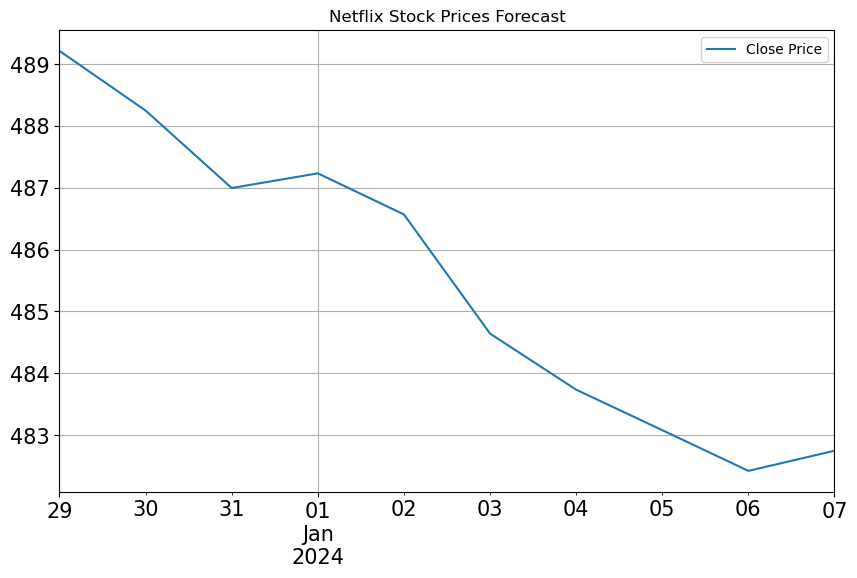

In [7]:
forecast['Close'].plot(figsize=(10, 6), title="Netflix Stock Prices Forecast", fontsize=15, label="Close Price")
plt.legend()
plt.grid()
plt.show();

### Why AutoTS is so usefull
- There are dozens of forecasting models usable in the sklearn style of **.fit() and .predict()**. 
- These includes naive, statistical, machine learning, and deep learning models. 
- Additionally, there are over 30 time series specific transforms usable in the **sklearn style of .fit(), .transform() and .inverse_transform()**. 
- All of these function directly on Pandas Dataframes, without the need for conversion to proprietary objects.

These models are all designed for integration in an AutoML feature search which automatically finds the best models, preprocessing, and ensembling for a given dataset through genetic algorithms.